# Multi-panel Visualizations

To create a multi-panel visualization, we can use the `sns.FacetGrid`. 

This class takes in a dataframe, the **names of the variables** that will form the **row, column, or hue dimensions** of the grid, and the **plot type** to be produced for each subset of the data. The plot type is provided as a method of the FacetGrid object.

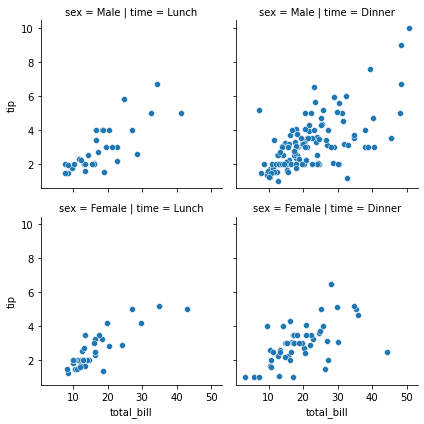

In [6]:
import pandas as pd 
import seaborn as sns 

tips = sns.load_dataset("tips")

g = sns.FacetGrid(tips, col="time",  row="sex");
g.map(sns.scatterplot, "total_bill", "tip");

The variable specification in `FacetGrid.map()` requires a positional argument `mapping`, but if the function has a `data` parameter and accepts named variable assignments, you can also use `FacetGrid.map_dataframe()`:

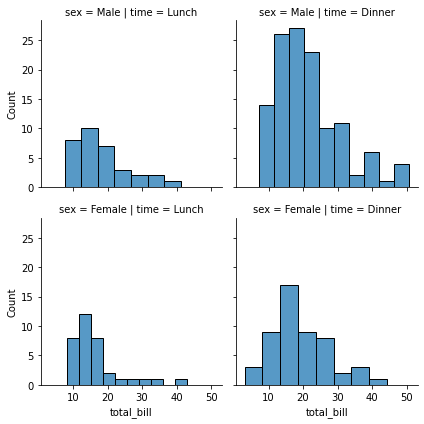

In [3]:

g = sns.FacetGrid(tips, col="time",  row="sex");
g.map_dataframe(sns.histplot, x="total_bill");

The FacetGrid constructor accepts a hue parameter. Setting this will condition the data on another variable and make multiple plots in different colors. Where possible, label information is tracked so that a single legend can be drawn:

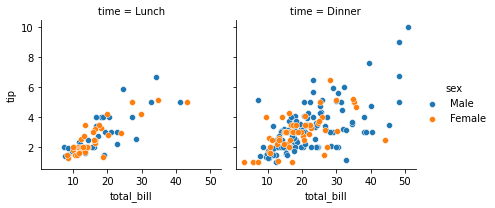

In [9]:
g = sns.FacetGrid(tips, col="time", hue="sex");
g.map_dataframe(sns.scatterplot, x="total_bill", y="tip");
g.add_legend();

The FacetGrid object has some other useful parameters and methods for tweaking the plot:

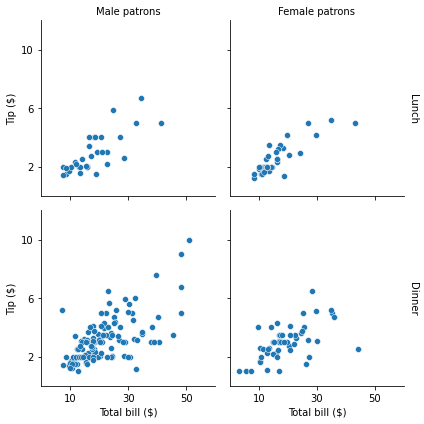

In [5]:
g = sns.FacetGrid(tips, col="sex", row="time", margin_titles=True)
g.map_dataframe(sns.scatterplot, x="total_bill", y="tip")
g.set_axis_labels("Total bill ($)", "Tip ($)")
g.set_titles(col_template="{col_name} patrons", row_template="{row_name}")
g.set(xlim=(0, 60), ylim=(0, 12), xticks=[10, 30, 50], yticks=[2, 6, 10])
g.tight_layout()
g.savefig("facet_plot.png")